In [1]:
!pip install  gdown

In [2]:
!gdown --id 13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36

#https://drive.google.com/file/d/13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36/view?usp=sharing

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36
To: /kaggle/working/FinalDataset-V1-t1.tar
100%|███████████████████████████████████████| 95.4M/95.4M [00:00<00:00, 225MB/s]


In [3]:
!tar -xvf "FinalDataset-V1-t1.tar" -C "/kaggle/working"

content/drive/MyDrive/Final Dataset- V1/
content/drive/MyDrive/Final Dataset- V1/Normal/
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation0-0.02 346.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 097.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 101.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 113.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 068.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 050.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 053.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 079.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 099.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 029.jpg
content/drive/MyDrive/Final Dataset- V1/Normal/Deforestation_3_0.0038-0.048 105.

### Importing Libraries

In [4]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=732f504ed7dc943b8c3ec34b61da22e0ee5afbc6bd19352f8745faabdcbed764
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [5]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
import tensorflow as tf
from tqdm import tqdm
#matplotlib.use("Agg")
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from skimage import color, io
from tensorflow.keras import layers, Model, utils 
from skimage import color, io
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from io import BytesIO
import time
from imutils import paths
import shutil
import itertools
import pandas as pd
from IPython.display import Image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Activation, Dense, Flatten, RepeatVector, Dropout,GlobalAveragePooling2D,GlobalMaxPooling2D

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### creating the dataset into correct format

In [6]:
INIT_LR = 1e-1
BS = 8
EPOCHS = 500
IMG_PATH_BASE = "/kaggle/working/content/drive/MyDrive/Final Dataset- V1"
IMG_PATH_NORMAL = IMG_PATH_BASE+'/Normal'
IMG_PATH_ANOMALY = IMG_PATH_BASE+'/Anomaly'

test = os.listdir(IMG_PATH_BASE)
print(test)

print("[INFO] loading images...")
imagePaths_base = list(paths.list_images(IMG_PATH_BASE))
imagePaths_normal = list(paths.list_images(IMG_PATH_NORMAL))
imagePaths_anomaly = list(paths.list_images(IMG_PATH_ANOMALY))


print(len(imagePaths_base))
print("Number of data in the normal class")
print(len(imagePaths_normal))
print("Number of data in the anomaly class")
print(len(imagePaths_anomaly))

vgg_img_width = 224
vgg_img_height = 224
VGG_SHAPE = (vgg_img_width, vgg_img_height,3)

['Normal', 'Anomaly']
[INFO] loading images...
2511
Number of data in the normal class
2012
Number of data in the anomaly class
499


In [7]:
dataset = []
#dataset = np.array([])
labels = []
#labels = np.array([])

In [8]:

for imgP in tqdm(imagePaths_normal):
    
    image_normal = cv2.imread(imgP)
   
    image_normal = cv2.resize(image_normal, (224, 224),interpolation = cv2.INTER_CUBIC)
   
    dataset.append(image_normal)
    labels.append(0)
    
print(labels)

100%|██████████| 2012/2012 [00:06<00:00, 325.08it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Image Preproccessing

In [9]:
def prepareImageForModel(img):
      tf.keras.applications.vgg16.preprocess_input(img)

     

#### Croppping the image

In [10]:
def croppingImage(img):
    x=0
    w=325
    y=0
    h=640
    return img[x:w,y:h]

In [11]:
i=0
for imgP in tqdm(imagePaths_anomaly):
    image_anomaly = cv2.imread(imgP)
    image_anomaly =  image_anomaly[0:640,0:640]
    image_anomaly = cv2.resize(image_anomaly, (224, 224),interpolation = cv2.INTER_AREA)
    #image_anomaly =  cropImage(image_anomaly)
    i=i+1
    dataset.append(image_anomaly)
    labels.append(1) 

100%|██████████| 499/499 [00:02<00:00, 181.13it/s]


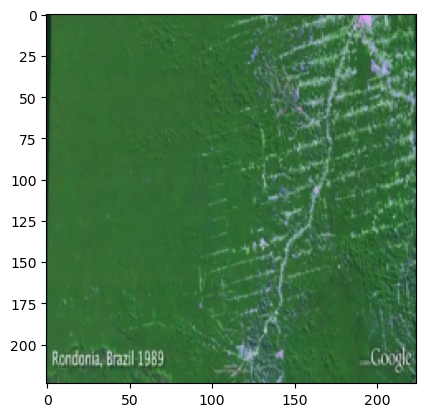

In [12]:

plt.grid(False)
plt.imshow(dataset[2499])

In [13]:
len(dataset)
dataset = np.asarray(dataset)
dataset.shape

len(labels)
labels = np.asarray(labels)
print(labels)

[0 0 0 ... 1 1 1]


In [14]:
print(dataset.shape)
print(labels[2500])

(2511, 224, 224, 3)
1


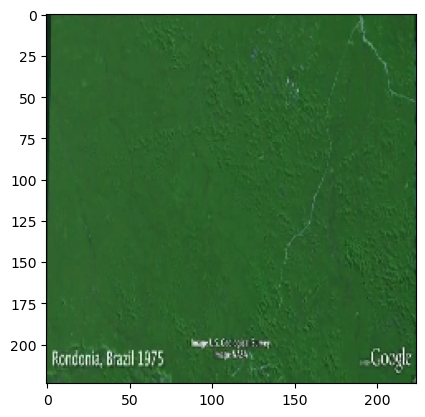

In [15]:
plt.imshow(dataset[1400])

In [16]:
dataset.shape

(2511, 224, 224, 3)

# Adding the Preprocessing part

# Resize the images to cut off the letters

# Feature Extraction

# 1. ResNET 50


In [17]:
vgg = tf.keras.applications.resnet50.ResNet50(include_top=False, #to remove the classification layers
                                          weights='imagenet', #trains the model using imagenet weights
                                          input_shape=VGG_SHAPE #define the input shape of the model
                                          )
 
for layer in vgg.layers:
    layer.trainable = False
  #Convert the model into a sequential model
model = Sequential()(vgg.layers[-1].output)
#Add GlobalMaxPooling2D layer for dimension reduction
model = GlobalMaxPooling2D()(model)
model = Model(inputs=vgg.inputs, outputs=model)

94765736/94765736 [==============================] - 0s 0us/step


In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

##### Adding a trainable fully connected layer for classification.

In [19]:
resNetModel = Sequential()
resNetModel.add(model)
resNetModel.add(Dense(512, activation='relu', input_dim=(None,512)))
resNetModel.add(Dense(1, activation='sigmoid'))

In [20]:
resNetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


************************************

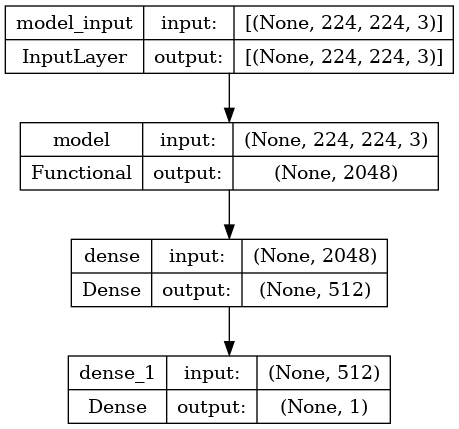

In [21]:
utils.plot_model(resNetModel, show_shapes=True, show_layer_names=True)

## adding weights

weights = compute_class_weight(class_weight ='balanced', 
                               classes= np.unique(trainY),
                               y= trainY


In [22]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight ='balanced', 
                               classes= np.unique(labels),
                               y= labels)


                               
                               
cw = dict(zip( np.unique(labels), weights))
print(cw)

{0: 0.6240059642147118, 1: 2.5160320641282565}


In [23]:
from keras import optimizers
resNetModel.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [24]:
history = resNetModel.fit(dataset, labels,class_weight=cw, epochs=3)

Epoch 1/3
79/79 [==============================] - 160s 2s/step - loss: 0.0272 - accuracy: 0.9900
Epoch 2/3
79/79 [==============================] - 158s 2s/step - loss: 4.7487e-06 - accuracy: 1.0000
Epoch 3/3
79/79 [==============================] - 158s 2s/step - loss: 3.3803e-06 - accuracy: 1.0000


### Plot the Training and Vaidation accuracy 

In [25]:
history.history['accuracy']  

[0.9900438189506531, 1.0, 1.0]

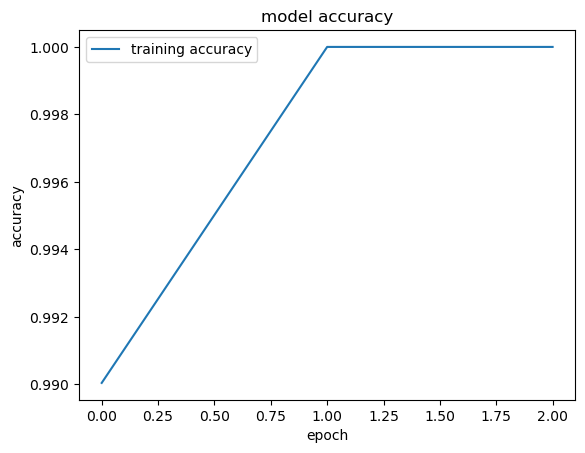

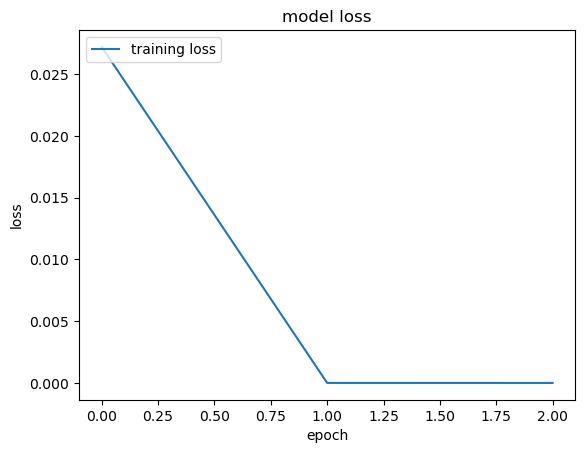

In [26]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss'], loc='upper left')

### Adding confusion matrix for the dataset


#### Get Model predictions

In [27]:
x= dataset
print(x)


[[[[  8  34  20]
   [ 14  39  26]
   [ 11  41  19]
   ...
   [ 28  74  21]
   [ 32  75  31]
   [ 17  57  22]]

  [[ 15  41  26]
   [ 18  43  30]
   [ 16  46  24]
   ...
   [ 43  91  38]
   [ 40  86  40]
   [ 19  61  26]]

  [[ 15  41  27]
   [ 19  44  30]
   [ 17  47  25]
   ...
   [ 45  93  40]
   [ 42  88  42]
   [ 20  63  26]]

  ...

  [[ 44  83  50]
   [ 45  90  47]
   [ 43  90  46]
   ...
   [ 33  78  31]
   [ 30  65  25]
   [ 98 123  94]]

  [[ 42  81  49]
   [ 44  88  48]
   [ 45  91  48]
   ...
   [ 40  86  40]
   [ 76 109  73]
   [114 136 111]]

  [[ 46  84  54]
   [ 45  89  48]
   [ 48  94  51]
   ...
   [ 17  63  19]
   [ 59  92  57]
   [ 78 100  75]]]


 [[[ 11  36  22]
   [ 11  37  23]
   [  9  42  18]
   ...
   [ 28  73  22]
   [ 32  74  32]
   [ 19  57  26]]

  [[ 16  42  26]
   [ 17  43  29]
   [ 14  48  23]
   ...
   [ 40  88  37]
   [ 40  85  42]
   [ 19  60  28]]

  [[ 15  41  25]
   [ 18  44  30]
   [ 16  50  25]
   ...
   [ 49  97  46]
   [ 46  92  48]
   [ 20  62

In [28]:


# predictions for the data (2500 images)
trure_targets =  labels

#confusion_matrix(trure_targets, predX)

In [29]:


predX=resNetModel.predict(x)
predX[0]

79/79 [==============================] - 161s 2s/step


array([2.3727582e-06], dtype=float32)

In [30]:
predX[0]
if(predX[0]>0.5):
    print("anomaly")
else:
    print("Normal")

Normal


In [31]:
predX[1600]
if(predX[1600]>0.5):
    print("anomaly")
else:
    print("Normal")

Normal


In [ ]:
predictions =[]
predX=resNetModel.predict(x)

for pred in predX:
    #print(pred.shape)
    
    if(pred>0 and pred<=0.5):
        print(pred)
        predictions.append(0)
    else:
        predictions.append(1)
    

74/79 [===========================>..] - ETA: 10s

In [ ]:
predictions =  np.asarray(predictions)
print(predictions.shape)
print(predictions[2000])
print(labels[2000])

print(predictions[2012])
print(labels[2012])

model.predict(
    trainX
)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
colorMap = sns.color_palette("crest")  



data = confusion_matrix(labels, predictions,labels=[0,1])
df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
sns.heatmap(df, annot=True, cmap=colorMap)

In [ ]:
#df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
df

In [ ]:

sns.heatmap(df, annot=True)



model.save('xrayVGG16_2.h5')
model.save(‘model_name.h5')


### Save the model

In [ ]:

 model.save('resNetModel.h5')

#### Load the model


In [ ]:
from keras.models import load_model
model = load_model('resNetModel.h5')
model.summary()


# **Explainability of the feature extractors**

### SHAP exlpainers


In [ ]:
!pip install shap

In [ ]:
import shap

class_names = ['Normal',"Anomaly"]

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(resNetModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[0:1], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip)

In [ ]:
#rows, columns = shap_values_fine.shape

print("SHAP VALues",shap_values_fine.shape)

In [ ]:
class_names.shape
len(shap_values_fine)
 

In [ ]:
shap.image_plot(shap_values_fine,dataset[0:1]/255.0,[["Normal"]])

### 100th Image

In [ ]:
import shap

class_names = ['Normal',"Anomaly"]

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(resNetModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[100:101], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

In [ ]:
shap.image_plot(shap_values_fine,dataset[100:101]/255.0,[["Normal"]])

### 1900th image

In [ ]:
class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(resNetModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[1900:1901], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

In [ ]:
shap.image_plot(shap_values_fine,dataset[1900:1901]/255,[["Normal"]])

### 2250th image

In [ ]:
class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(resNetModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2250:2251], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

In [ ]:
shap.image_plot(shap_values_fine,dataset[2250:2251]/255.0,[["Anomaly"]])

### 2450th image

In [ ]:
class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and iresNetModelmage masker
explainer_blur = shap.Explainer(resNetModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2450:2451], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

In [ ]:
shap.image_plot(shap_values_fine,dataset[2450:2451]/255.0,[["Anomaly"]])

In [ ]:
!pip install lime

In [ ]:
from lime import lime_image

lime_explainer = lime_image.LimeImageExplainer(feature_selection ='auto' )


#explanation = lime_explainer.explain_instance(trainX[1400].astype('double'), model.predict,  
                                         #top_labels=2, hide_color=0, num_samples=1000)
    
explanation = lime_explainer.explain_instance(dataset[1400].astype('double'), resNetModel.predict)



explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(
         X_train[100], 
         resNetModel.predict
)
plt.imshow(X_train[100])
image, mask = explanation.get_image_and_mask(
         model.predict(
              X_train[100].reshape((1,200,200,3))
         ).argmax(axis=1)[0],
         positive_only=False, 
         hide_rest=False)
plt.imshow(mark_boundaries(image, mask))


# create a list of our conditions
conditions = [
    (finalDf['target'] == 0) & (finalDf['output'] == 0),
    (finalDf['target'] == 0) & (finalDf['output'] == 1),
    (finalDf['target'] == 1) & (finalDf['output'] == 1),
    (finalDf['target'] == 0) & (finalDf['output'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['TP', 'FN', 'TN', 'FP']

# create a new column and use np.select to assign values to it using our lists as arguments
finalDf['type'] = np.select(conditions, values)

# display updated DataFrame
finalDf.head()


In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=3, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

In [ ]:
#2200th
explanation = explainer.explain_instance(
         dataset[2200], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2200])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

## 100th Image LIME 

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

explanation = explainer.explain_instance(
         dataset[100], 
         resNetModel.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.grid(False)
plt.subplot(1, 2, 1)
plt.imshow(dataset[100])
plt.grid(False)
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image, mask))

### 1900th Image

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

explanation = explainer.explain_instance(
         dataset[1900], 
         resNetModel.predict
)
plt.imshow(dataset[1900])
image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)

plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[1900])

plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

## 2250th image LIME

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

explanation = explainer.explain_instance(
         dataset[2250], 
         resNetModel.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2250])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

### 2450th Image

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)

explanation = explainer.explain_instance(
         dataset[2450], 
         resNetModel.predict
)
plt.imshow(dataset[2250])
image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.subplot(1, 2, 1)
plt.imshow(dataset[2450])
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image, mask))

In [ ]:
def evaluate_lime(img_no):
    explanation = explainer.explain_instance(
         trainX[img_no], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[img_no])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

In [ ]:
evaluate_lime(2)

In [ ]:
evaluate_lime(2450)

### LIME Explainations for various points of the dataset.

**Images selected are as follows**
1. An image from the normal behaviour :- dataset[100] 
2. An image from the normal behavour but close to the anomalous behaviour : dataset[1900]
3. An image from the anomalous behavour but close to the normal behaviour : dataset[2200]
3. An image from the anomalous behaviour: dataset[2450]

In [ ]:
#100th
explanation = explainer.explain_instance(
         dataset[100], 
         resNetModel.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.subplot(1, 2, 1)
plt.imshow(dataset[100])
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image, mask))




In [ ]:
#1900th
explanation = explainer.explain_instance(
         dataset[1900], 
         model.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.subplot(1, 2, 1)
plt.imshow(dataset[1900])
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image, mask))

In [ ]:
#2200th
explanation = explainer.explain_instance(
         dataset[2200], 
         resNetModel.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.subplot(1, 2, 1)
plt.imshow(dataset[2200])
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image, mask))

In [ ]:
#2450th
explanation = explainer.explain_instance(
         dataset[2450], 
         resNetModel.predict
)

image, mask = explanation.get_image_and_mask(
         explanation.top_labels[0], 
         positive_only=False, 
         hide_rest=False)
plt.subplot(1, 2, 1)
plt.imshow(dataset[2450])
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(image, mask))

In [ ]:
LIME_eval = np.array(100,1900,2200,2450)

LIME_eval